In [1]:
# The code was removed by Watson Studio for sharing.

In [8]:
import pandas as pd
from datetime import datetime
from IPython.core.display import HTML
HTML("<style>.container { width:100%; }</style>")

pd.set_option('display.max_columns', 150)
pd.set_option('display.max_rows', None)
pd.set_option('display.max_colwidth', None)

from dse_do_utils import DataManager, OptimizationEngine,ScenarioManager
from docplex.mp.model import Model

import matplotlib.pyplot as plt

In [4]:
MODEL_NAME = 'Unit_Commitment'
SCENARIO_NAME = 'Base_Scenario' 
sm = ScenarioManager(model_name=MODEL_NAME, scenario_name=SCENARIO_NAME, project = project)


InputTables, outputTables = sm.load_data_from_scenario()
InputTables.keys()

dict_keys(['Units', 'Demand'])

In [33]:
Demand = InputTables['Demand']

Demand['Date'] = pd.to_datetime(Demand['Date'] )
Demand = Demand.set_index('Date')
del Demand["Date_Sequence"]
Demand.head()

,demand
Date,
2022-04-22,1259.0
2022-04-23,1439.0
2022-04-24,1289.0
2022-04-25,1211.0
2022-04-26,1433.0


Text(0.5, 1.0, 'Demand')

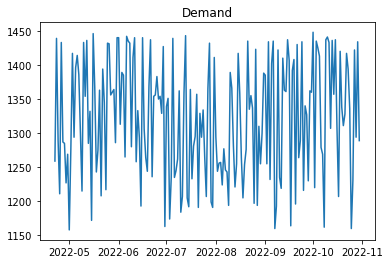

In [17]:
plt.plot(Demand["demand"])
plt.title("Demand")

### ARIMA model

In [34]:
#!pip install pmdarima
from pmdarima.arima import auto_arima

In [35]:
len(Demand)

192

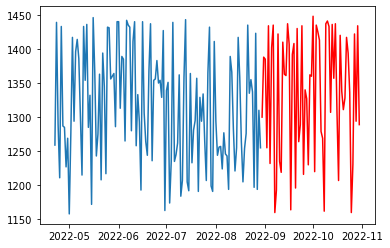

In [36]:
train = Demand.iloc[0:130]
test = Demand.iloc[130:]

plt.plot(train["demand"])
plt.plot(test["demand"],'r')

In [58]:
model = auto_arima(train, start_p=1, start_q=1,
                           max_p=6, max_q=6, m=12,
                           start_P=0, max_D = 5 , seasonal=True, 
                           stepwise=True)

In [59]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                        SARIMAX Results                                        
===============================================================================================
Dep. Variable:                                       y   No. Observations:                  130
Model:             SARIMAX(0, 1, 4)x(0, 0, [1, 2], 12)   Log Likelihood                -746.627
Date:                                 Mon, 25 Apr 2022   AIC                           1507.253
Time:                                         16:00:11   BIC                           1527.272
Sample:                                              0   HQIC                          1515.387
                                                 - 130                                         
Covariance Type:                                   opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -1.0752      0.097    -11.123      0.000      -1.265      -0.886
ma.L2          0.0187      0.137      0.137      0.891      -0.250       0.287
ma.L3          0.2774      0.137      2.024      0.043       0.009       0.546
ma.L4         -0.1288      0.098     -1.316      0.188      -0.321       0.063
ma.S.L12      -0.2025      0.110     -1.833      0.067      -0.419       0.014
ma.S.L24      -0.1303      0.100     -1.305      0.192      -0.326       0.065
sigma2      6071.7101   1099.783      5.521      0.000    3916.174    8227.246
===================================================================================
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):                 4.21
Prob(Q):                              0.92   Prob(JB):                         0.12
Heteroskedasticity (H):               0.75   Skew:                            -0.03
Prob(H) (two-sided):                  0.34   Kurtosis:                         2.12
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [60]:
prediction = pd.DataFrame ( model.predict(n_periods = len(test)), index= test.index, columns = ["demand_hat"])

In [61]:
prediction.head()

,demand_hat
Date,
2022-08-30,1306.662756
2022-08-31,1332.089989
2022-09-01,1295.162902
2022-09-02,1272.157212
2022-09-03,1273.975338


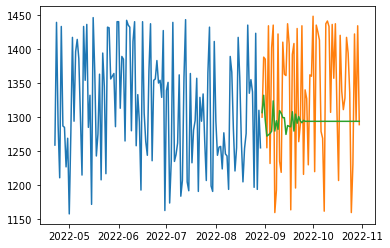

In [62]:
plt.figure()
plt.plot(train, label = "training")
plt.plot(test, label = "testing")
plt.plot(prediction, label = "prediction")